# Установка библиотек и их зависимостей

Установка зависимостей используемых модулей.

In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !pip install -q numpy>=1.18.5
    !pip install -q pandas>=1.0.5
    !pip install -q seaborn>=0.9.0
    !pip install -q matplotlib>=2.1.0
    !pip install -q scikit-learn>=0.23.2
    !pip install -q ucimlrepo>=0.0.7
    !pip install -q scipy>=1.14.1
    !pip install -q tqdm>=4.66.5
    !pip install -q pprintpp>=0.4.0

Необходимые ``import``'ы для выполнения задания.

In [2]:
# Essential
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import scipy as scp

# Scipy
from scipy.spatial.distance import cdist

# Scikit-learn preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Scikit-learn models
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
# Scikit-learn model selection
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
# Scikit-learn metrics
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
# Scikit-learn base
from sklearn.base import BaseEstimator

# Utilities
from ucimlrepo import fetch_ucirepo
from copy import deepcopy
from tqdm.notebook import tqdm
from zlib import crc32
from pprint import pprint

# Генератор задания

Генератор задания, взятый по [этой ссылке](https://github.com/andriygav/MachineLearningSeminars/blob/master/hometask/task1-1/generator.ipynb).

In [3]:
types = ['regression', 'classification']
datasets = {'regression': [{'name': 'Servo Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Servo'},
                           {'name': 'Forest Fires Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
                           {'name': 'Boston Housing Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston'},
                           {'name': 'Diabetes Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'}],
            'classification': [{'name': 'Spambase Data Set',
                                'url': 'https://archive.ics.uci.edu/ml/datasets/Spambase'},
                               {'name': 'Wine Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine'},
                               {'name': 'Breast Cancer Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'},
                               {'name': 'MNIST',
                                'url': 'http://yann.lecun.com/exdb/mnist/'}]}
methods = {'regression': ['Линейная регрессия',
                          'Перцептрон',
                          'Надарая-Ватсона',
                          'SVR'],
           'classification': ['Логистическая регрессия',
                              'Перцептрон',
                              'k-ближайших соседей',
                              'Метод потенциальных функций',
                              'Метод Парзеновского окна',
                              'SVM']}
task = dict()
task['mail'] = "subkhankulov.rr@phystech.edu"
task['id'] = crc32(task['mail'].encode('utf-8'))
np.random.seed(task['id'])
task['type'] = np.random.choice(types)
task['dataset'] = np.random.choice(datasets[task['type']])
task['method'] = np.random.choice(
    methods[task['type']], size=3, replace=False).tolist()

task

{'mail': 'subkhankulov.rr@phystech.edu',
 'id': 2245726915,
 'type': 'regression',
 'dataset': {'name': 'Forest Fires Data Set',
  'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
 'method': ['Надарая-Ватсона', 'SVR', 'Перцептрон']}

# Формулировка задания
Требуется:
- Провести анализ выборки:
  - Определить тип признаков.
  - Выполнить визуальный анализ данных.
- Выполнить препроцесинг данных:
  - Преобразовать категориальные признаки в вещественные.
  - Отнормировать признаки.
- Провести эксперимент для предложенных методов (Перцептрон, Надарая-Ватсона, SVR):
  - Выполнить подбор гиперпараметров.
  - Подобрать регуляризаторы.
  - Получить итоговые модели.
- Описать полученные результаты:
  - Какая модель лучше и почему.
  - С какими проблемами столкнулись во время выполнения, возможно недочеты стандартных библиотек.
  - Совпадают ли полученные результаты с ожидаемыми результатами.


# Загрузка данных

In [4]:
# Получаем датасет
forest_fires = fetch_ucirepo(id=162)

# Вывод метаданных
pprint(forest_fires.metadata)

{'abstract': 'This is a difficult regression task, where the aim is to predict '
             'the burned area of forest fires, in the northeast region of '
             'Portugal, by using meteorological and other data (see details '
             'at: http://www.dsi.uminho.pt/~pcortez/forestfires).',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': 'In [Cortez and Morais, 2007], the output '
                                "'area' was first transformed with a ln(x+1) "
                                'function.\r\n'
                                '   Then, several Data Mining methods were '
                                'applied. After fitting the models, the '
                     

In [5]:
# Признаки
pprint(forest_fires.data.features)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0

[517 rows x 12 columns]


In [6]:
# Предсказываемое значение
pprint(forest_fires.data.targets)

      area
0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
..     ...
512   6.44
513  54.29
514  11.16
515   0.00
516   0.00

[517 rows x 1 columns]


In [7]:
# Датасет в качестве ``pandas DataFrame``
df = forest_fires.data.features
df['target'] = forest_fires.data.targets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  target  517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# Aнализ выборки:

In [8]:
# Информация о переменных в датасете
pprint(forest_fires.variables)

     name     role         type demographic  \
0       X  Feature      Integer        None   
1       Y  Feature      Integer        None   
2   month  Feature  Categorical        None   
3     day  Feature  Categorical        None   
4    FFMC  Feature   Continuous        None   
5     DMC  Feature      Integer        None   
6      DC  Feature   Continuous        None   
7     ISI  Feature   Continuous        None   
8    temp  Feature   Continuous        None   
9      RH  Feature      Integer        None   
10   wind  Feature   Continuous        None   
11   rain  Feature      Integer        None   
12   area   Target      Integer        None   

                                          description            units  \
0   x-axis spatial coordinate within the Montesinh...             None   
1   y-axis spatial coordinate within the Montesinh...             None   
2                  month of the year: 'jan' to 'dec'              None   
3                     day of the week: 'mon' 

- В выборке имеем 517 объектов, 12 признаков.
- ``missing_values`` для всех признаков имеет значение 0, следовательно все признаки определены для каждого объекта в выборке.
- Имеем признаки различных типов - представленные целочисленными и действительными значениями, а также категориальные признаки:
  - Целочисленные: ``X``, ``Y``, ``DMC``, ``RH``, ``rain``.
  - Действительные значения: ``FFMC``, ``DS``, ``ISI``, ``temp``,``wind``.
  - Категориальные: ``month`` и ``day``.
- Предсказываемое значение (``target``) ``area`` является непрерывной величиной. Имеем задачу регрессии. 

In [9]:
# Отделяем численные и категориальные признаки
categorical_features = ["month", "day"]
numerical_features = list(set(df.columns) - set(categorical_features) - set(["target"]))

print(f"Категориальные признаки: {categorical_features}")
print(f"Численные признаки: {numerical_features}")

Категориальные признаки: ['month', 'day']
Численные признаки: ['X', 'rain', 'FFMC', 'DC', 'RH', 'wind', 'Y', 'DMC', 'temp', 'ISI']


In [10]:
# Случайный срез из данных
df.sample(5, random_state=0)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,target
213,7,3,mar,mon,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,27.35
435,2,5,jul,sat,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.00
343,8,6,sep,mon,91.5,130.1,807.1,7.5,15.9,51,4.5,0.0,2.18
230,4,4,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,88.49
171,8,6,aug,wed,85.6,90.4,609.6,6.6,17.4,50,4.0,0.0,2.69


In [11]:
# Описание численных признаков
df[numerical_features].describe()

,X,rain,FFMC,DC,RH,wind,Y,DMC,temp,ISI
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,0.021663,90.644681,547.940039,44.288201,4.017602,4.299807,110.872340,18.889168,9.021663
std,2.313778,0.295959,5.520111,248.066192,16.317469,1.791653,1.229900,64.046482,5.806625,4.559477
min,1.000000,0.000000,18.700000,7.900000,15.000000,0.400000,2.000000,1.100000,2.200000,0.000000
25%,3.000000,0.000000,90.200000,437.700000,33.000000,2.700000,4.000000,68.600000,15.500000,6.500000
50%,4.000000,0.000000,91.600000,664.200000,42.000000,4.000000,4.000000,108.300000,19.300000,8.400000
75%,7.000000,0.000000,92.900000,713.900000,53.000000,4.900000,5.000000,142.400000,22.800000,10.800000
max,9.000000,6.400000,96.200000,860.600000,100.000000,9.400000,9.000000,291.300000,33.300000,56.100000


Можем видеть, что признак ``rain`` имеет малое стандартное отклонение и практически для всех объектов выборки имеет нулевое значение. 

In [12]:
# Описание категориальных признаков
df[categorical_features].describe()

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


Категориальные признаки:
  - ``month`` - месяц, в формате строки.
  - ``day`` - день недели, в формате строки.

При препроцессинге данных необходимо перевести данные признаки в численный формат.

# Препроцесинг данных

In [13]:
# Отделяем признаки и предсказываемое значение
X = df.drop("target", axis=1)
y = df["target"]
pprint(X)
pprint(y)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0

[517 rows x 12 columns]
0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name

In [14]:
X.sample(5, random_state=0)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
213,7,3,mar,mon,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0
435,2,5,jul,sat,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0
343,8,6,sep,mon,91.5,130.1,807.1,7.5,15.9,51,4.5,0.0
230,4,4,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0
171,8,6,aug,wed,85.6,90.4,609.6,6.6,17.4,50,4.0,0.0


In [15]:
y.sample(5, random_state=0)

213    27.35
435     0.00
343     2.18
230    88.49
171     2.69
Name: target, dtype: float64

Преобразуем категориальные признаки в численный формат.

In [16]:
# Кодирование признаков
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

# Создание DataFrame c читаемыми именами кодированных признаков
encoded_features = encoder.get_feature_names_out(categorical_features)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_features, index=X.index)
X_encoded_df.sample(5, random_state=0)

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
435,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
171,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Делим выборку на обучающую и тестовую.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f"Размер обучающей выборки составляет {len(X_train.index)} объектов.")
print(f"Размер тестовой выборки составляет {len(X_test.index)} объектов.")

Размер обучающей выборки составляет 361 объектов.
Размер тестовой выборки составляет 156 объектов.


In [18]:
X_train.sample(5, random_state=0)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
328,6,5,sep,sat,92.2,102.3,751.5,8.4,19.7,35,1.8,0.0
341,8,6,sep,mon,91.9,111.7,770.3,6.5,15.7,51,2.2,0.0
325,1,4,sep,sat,92.2,102.3,751.5,8.4,24.2,27,3.1,0.0
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0
41,4,4,aug,sat,90.2,96.9,624.2,8.9,18.4,42,6.7,0.0


In [19]:
y_train.sample(5, random_state=0)

328    0.0
341    0.0
325    0.0
379    0.0
41     0.0
Name: target, dtype: float64

Произведем нормировку численных признаков. 

'Обучание' ``scaler``'а производим на обучающей выборке, чтобы не вносить в модель информацию о предсказываемом значении.

Для координат нормировка представляет растяжение и перенос координат.

In [20]:
# Обучаем 'scaler' на обучающей выборке
x_scaler = StandardScaler()
x_scaler.fit(X[numerical_features])

# Нормируем численные признаки во всей выборке
X_scaled = x_scaler.transform(X[numerical_features])
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features, index=X.index)
X_scaled_df.sample(5, random_state=0)

,X,rain,FFMC,DC,RH,wind,Y,DMC,temp,ISI
213,1.008313,-0.073268,-0.552096,-1.792143,0.105008,0.995798,-1.057862,-0.916977,-1.359965,-0.882899
435,-1.154748,-0.073268,0.028164,-0.691372,0.411724,-1.238940,0.569860,-0.409042,0.846548,-0.751178
343,1.440925,-0.073268,0.155096,1.045733,0.411724,0.269509,1.383722,0.300505,-0.515284,-0.334060
230,-0.289524,-0.073268,0.408960,0.611961,-1.428577,0.269509,-0.244001,0.350517,1.294746,0.039151
171,1.440925,-0.073268,-0.914758,0.248803,0.350381,-0.009834,1.383722,-0.319958,-0.256709,-0.531642


Объединяем скалированные численные признаки и кодированные категориальные

In [21]:
X_proc = np.hstack((X_scaled, X_encoded))
X_proc_df = pd.concat([X_scaled_df, X_encoded_df], axis=1)
X_proc_df.describe()

,X,rain,FFMC,DC,RH,wind,Y,DMC,temp,ISI,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,2.113074e-16,-6.871787e-18,-1.752306e-15,6.871787e-17,2.198972e-16,-4.191790e-16,2.611279e-16,-2.748715e-17,2.542561e-16,1.030768e-17,...,0.001934,0.029014,0.332689,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,0.043980,0.168007,0.471632,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138
min,-1.587360e+00,-7.326831e-02,-1.304582e+01,-2.179108e+00,-1.796637e+00,-2.021098e+00,-1.871724e+00,-1.715608e+00,-2.876943e+00,-1.980578e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.221360e-01,-7.326831e-02,-8.063453e-02,-4.448281e-01,-6.924563e-01,-7.361236e-01,-2.440010e-01,-6.606652e-01,-5.842379e-01,-5.535954e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.895238e-01,-7.326831e-02,1.732292e-01,4.691190e-01,-1.403660e-01,-9.833712e-03,-2.440010e-01,-4.020255e-02,7.082076e-02,-1.364774e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.008313e+00,-7.326831e-02,4.089598e-01,6.696628e-01,5.344111e-01,4.929823e-01,5.698604e-01,4.927389e-01,6.741643e-01,3.904086e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.873537e+00,2.157228e+01,1.007353e+00,1.261610e+00,3.417549e+00,3.007063e+00,3.825306e+00,2.819865e+00,2.484195e+00,1.033538e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Далее скалируем значение ``target``

In [22]:
# y = np.log(np.ones(len(y)) + y)
# y_scaled = (y - y.mean()) / y.std()
# y_proc_df = pd.DataFrame(y_scaled, columns=["target"], index=y.index)
y_proc_df = pd.DataFrame(np.log(np.ones(len(y)) + y), columns=["target"], index=y.index)
y_proc_df.describe()

,target
count,517.000000
mean,1.111026
std,1.398436
min,0.000000
25%,0.000000
50%,0.418710
75%,2.024193
max,6.995620


Повторяем деление выборки на обучающую и тестовую. Множества объектов обучающей и тестовой выборок совпадают с полученными раннее, только теперь признаки в них отнормированны и закодированы.

In [23]:
X_proc_train, X_proc_test, y_proc_train, y_proc_test = train_test_split(X_proc_df, y_proc_df, test_size=0.3, random_state=0)

In [24]:
X_proc_train.sample(5, random_state=0)

,X,rain,FFMC,DC,RH,wind,Y,DMC,temp,ISI,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
328,0.575701,-0.073268,0.282028,0.821382,-0.569770,-1.238940,0.569860,-0.133975,0.139774,-0.136477,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
341,1.440925,-0.073268,0.227629,0.897242,0.411724,-1.015466,1.383722,0.012935,-0.549761,-0.553595,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
325,-1.587360,-0.073268,0.282028,0.821382,-1.060516,-0.512650,-0.244001,-0.133975,0.915502,-0.136477,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
379,-0.289524,-0.073268,-13.045818,-1.519372,3.417549,-1.741756,0.569860,-1.715608,-2.359792,-1.980578,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41,-0.289524,-0.073268,-0.080635,0.307716,-0.140366,1.498614,-0.244001,-0.218371,-0.084325,-0.026709,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
y_proc_train.sample(5, random_state=0)

,target
328,0.0
341,0.0
325,0.0
379,0.0
41,0.0


In [26]:
X_proc_train.describe()

,X,rain,FFMC,DC,RH,wind,Y,DMC,temp,ISI,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,...,361.0,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,-0.031874,0.016672,0.016008,-0.025024,-0.020398,-0.038619,-0.016300,0.003545,-0.004723,0.007103,...,0.0,0.033241,0.315789,0.146814,0.157895,0.174515,0.168975,0.124654,0.135734,0.091413
std,1.012758,1.181117,1.013211,1.011153,1.010198,1.008912,1.012107,1.009375,1.010948,1.045774,...,0.0,0.179514,0.465475,0.354412,0.365148,0.380079,0.375250,0.330784,0.342981,0.288595
min,-1.587360,-0.073268,-13.045818,-2.179108,-1.796637,-1.741756,-1.871724,-1.715608,-2.876943,-1.980578,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.722136,-0.073268,-0.062501,-0.472670,-0.753800,-0.736124,-0.244001,-0.846648,-0.584238,-0.553595,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.289524,-0.073268,0.173229,0.457417,-0.201709,-0.009834,-0.244001,-0.038640,0.088059,-0.136477,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.008313,-0.073268,0.408960,0.666031,0.534411,0.492982,0.569860,0.492739,0.674164,0.368455,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.873537,21.572284,1.007353,1.240224,3.417549,3.007063,3.825306,2.799547,2.449718,10.335381,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
X_proc_test.describe()

,X,rain,FFMC,DC,RH,wind,Y,DMC,temp,ISI,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.073759,-0.038580,-0.037045,0.057907,0.047203,0.089369,0.037720,-0.008204,0.010928,-0.016436,...,0.006410,0.019231,0.371795,0.205128,0.108974,0.134615,0.217949,0.102564,0.096154,0.134615
std,0.972326,0.305370,0.974245,0.977740,0.980857,0.979698,0.976869,0.984405,0.980611,0.891638,...,0.080064,0.137777,0.484840,0.405096,0.312611,0.342412,0.414182,0.304366,0.295752,0.342412
min,-1.587360,-0.073268,-7.297618,-2.148442,-1.551263,-2.021098,-1.871724,-1.695291,-2.532176,-1.892764,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.722136,-0.073268,-0.098768,-0.149561,-0.692456,-0.736124,-0.244001,-0.505940,-0.575619,-0.542619,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.143088,-0.073268,0.173229,0.474163,-0.079023,-0.009834,-0.244001,-0.044891,0.036344,-0.114524,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.008313,-0.073268,0.408960,0.670066,0.549747,0.772325,0.569860,0.473984,0.553496,0.533107,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.873537,2.632426,0.989220,1.261610,3.356206,3.007063,3.825306,2.819865,2.484195,1.971066,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
y_proc_train.describe()

,target
count,361.000000
mean,1.042865
std,1.345569
min,0.000000
25%,0.000000
50%,0.215111
75%,1.998774
max,6.616440


In [29]:
y_proc_test.describe()

,target
count,156.000000
mean,1.268756
std,1.506423
min,0.000000
25%,0.000000
50%,0.864357
75%,2.178786
max,6.995620


Произведем анализ взаимной зависимости признаков.

In [30]:
# sns.pairplot(X_scaled_df)

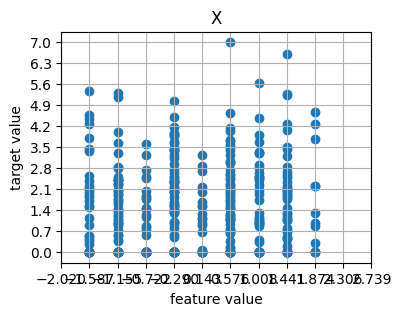

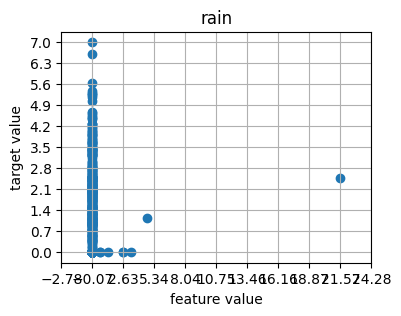

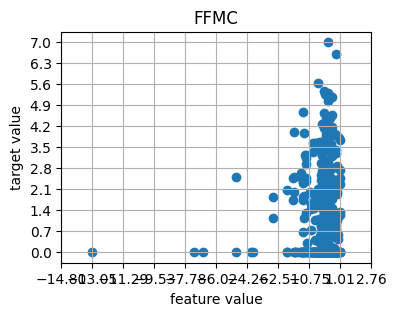

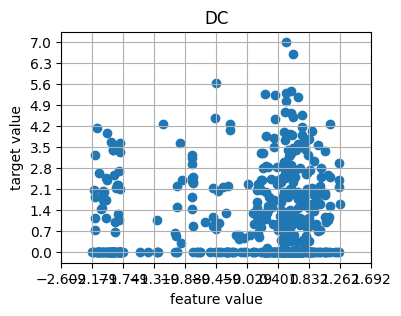

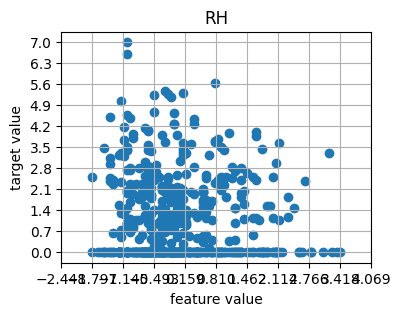

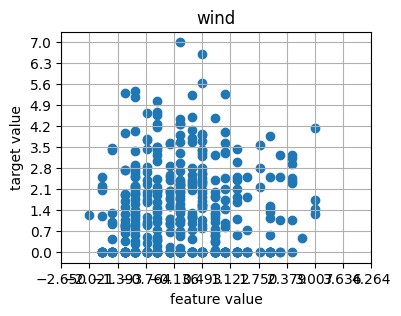

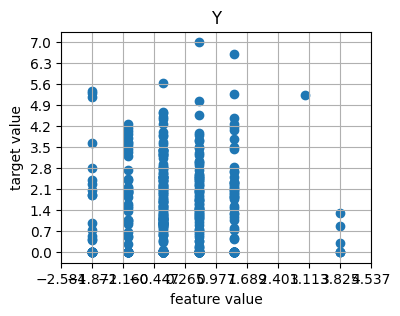

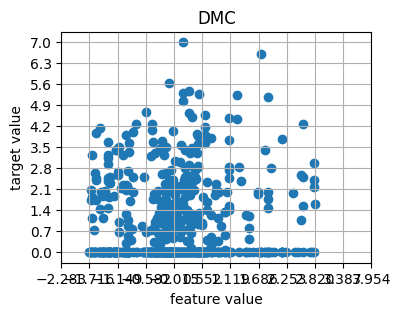

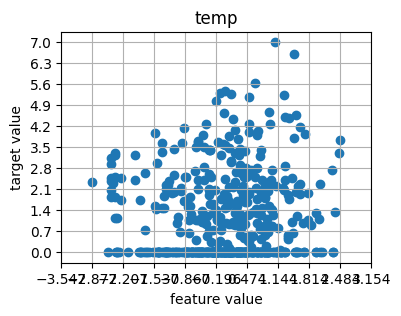

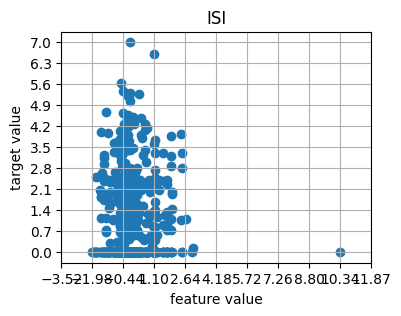

In [31]:
y_proc_df_min = y_proc_df.min()[0]
y_proc_df_max = y_proc_df.max()[0]

y_step = round((y_proc_df_max - y_proc_df_min) / 10, 2)

for feature in X_proc_df[numerical_features].columns:
    x_min = min(X_proc_df[feature])
    x_max = max(X_proc_df[feature])
    x_step = (x_max - x_min) / 8
    
    plt.figure(figsize=[4,3])
    plt.xlim(x_min, x_max)

    plt.xticks(np.arange(x_min - x_step, x_max + 2 * x_step, x_step))
    plt.yticks(np.arange(y_proc_df_min - y_step, y_proc_df_max + 2 * y_step, y_step))
    
    plt.grid()
    plt.title(feature)
    plt.xlabel("feature value")
    plt.ylabel("target value")

    plt.scatter(X_proc_df[feature], y_proc_df)
    plt.show()

Из графиков зависимости предсказываемого значения от признаков, можно сделать следующие выводы:
  - Предсказывамое значение принимает большие значения лишь при нулевом значении ``rain``, вероятно существует зависимость предсказываемого значения от признака ``rain``.

# Эксперименты для предложенных методов

В качестве метрики используем ``neg_mean_absolute_error`` (mean absolute error regression loss).

In [32]:
regression_scoring = 'neg_mean_absolute_error'
regression_metric = mean_absolute_error

## Перцептрон

In [33]:
# Параметры конструктора
MLPRegressor().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Список гиперпараметров, которые будут подбираться:
  - ``hidden_layer_sizes`` - количество и размер скрытых слоев
  - ``activation`` - функция активации
  - ``alpha`` - 'сила' L2-регуляризации
  - ``solver`` - использование классического SGD или оптимизации Adam

In [34]:
# Размер скрытого слоя
hidden_layer_dims = [10, 150]

# Ниже приведены фактические размеры скрытых слоев, которые
# использовались для исследования модели и подбора оптимальный
# гиперпараметров (см. комментарий к 'perceptron_param_grid').
# hidden_layer_dims = [10, 50, 100, 150]

# Количество скрытых слоев
hidden_layer_nums = [1, 3]

# Всевозможные комбинации вида 'num слоев размера dim'. 
hidden_layer_sizes = []
for num in hidden_layer_nums:
    for dim in hidden_layer_dims:
        hidden_layer_sizes.append([dim] * num)

# Сетка параметров
perceptron_param_grid = {
  'hidden_layer_sizes': hidden_layer_sizes, 
  'activation': ["logistic", "tanh", "relu"],
  'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
  'solver': ["sgd", "adam"]
}

# Ниже приведена фактическая сетка параметров, которая использовалась для исследования
# модели и подбора оптимальный гиперпараметров. Данная сетка параметров была сокращена
# так как время, затрачиваемое на обучение получалось крайне большим. Чтобы проверяющий
# данную работу не находился в длительном ожидании, количество комбинаций параметров 
# было решено сократить. 
# perceptron_param_grid = {
#   'hidden_layer_sizes': hidden_layer_sizes, 
#   'activation': ["logistic", "tanh", "relu"],
#   'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0],
#   'solver': ["sgd", "adam"]
# }
pprint(perceptron_param_grid)

{'activation': ['logistic', 'tanh', 'relu'],
 'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
 'hidden_layer_sizes': [[10], [150], [10, 10, 10], [150, 150, 150]],
 'solver': ['sgd', 'adam']}


In [35]:
perceptron = MLPRegressor(
  max_iter=20000, # Установим максимальное количество итераций больше дефолтного значения (1000)
  random_state=0 # Фиксируем seed
)

In [37]:
grid_search = GridSearchCV(
  estimator=perceptron, 
  param_grid=perceptron_param_grid,
  scoring=regression_scoring,
  n_jobs=-1
)

# Производим поиск лучших параметров
grid_search.fit(X_proc_train, y_proc_train.values.ravel())

# Запоминаем результаты: лучшая модель, её параметры и score
perceptron_best = grid_search.best_estimator_
perceptron_best_params = grid_search.best_params_
perceptron_best_score = grid_search.best_score_

# Выводим результаты
print(f"Scoring: {regression_scoring}")
print(f"Best score: {round(perceptron_best_score, 6)}")
print("Best parameters:")
pprint(perceptron_best_params)

# Результаты на тестовой выборке
y_pred = perceptron_best.predict(X_proc_test)
perceptron_test_score = -regression_metric(y_proc_test, y_pred)
print(f"Test score: {round(perceptron_test_score, 6)}")

Scoring: neg_mean_absolute_error
Best score: -1.090438
Best parameters:
{'activation': 'logistic',
 'alpha': 100.0,
 'hidden_layer_sizes': [10, 10, 10],
 'solver': 'adam'}
Test score: -1.21013


Для сравнения полученных результатов с приведёнными в описании датасета и уже проведенных на нем экспериментов, произведем обратное преобразование ``y_pred`` и ``y_proc_test`` и посчитаем метрику на полученных данных.

In [38]:
y_pred_trans = np.expm1(perceptron_best.predict(X_proc_test))
perceptron_test_score = regression_metric(np.expm1(y_proc_test), y_pred_trans)
print(f"Test score for back-transformed: {round(perceptron_test_score, 6)}")

Test score for back-transformed: 18.132448


## Надарая-Ватсона

Определим методы для различных ядер.

In [39]:
# Прямоугольное ядро
def rectang_kernel(distance):
  return (np.abs(distance) <= 1.)

# Треугольное ядро
def triang_kernel(distance: np.array):
  return (np.abs(distance) <= 1.) * (1 - np.linalg.norm(distance))

# Квадратичное (Епанечникова) ядро
def epanechnikov_kernel(distance: np.array):
  return (np.abs(distance) <= 1.) * (1 - distance**2)

# Квадратическое ядро
def quadr_kernel(distance: np.array):
  return (np.abs(distance) <= 1.) * (1 - distance**2)**2

# Гауссовское ядро
def gauss_kernel(distance: np.array):
  return np.exp(-2 * distance**2)

Список гиперпараметров, которые будут подбираться:
  - функция ядра ``kernel``
  - ширина окна ``h`` для ядра

In [40]:
# Сетка параметров
fnv_param_grid = {
  'kernel': [rectang_kernel, triang_kernel, epanechnikov_kernel, quadr_kernel, gauss_kernel],
  'h': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50]
}

In [41]:
# Константа, добавляемая к знаменателю при вычислении дроби в функции 'predict'
FNV_EPS = 1e-10

class FNV(BaseEstimator):
  """
  Класс модели с использованием формулы Надарая-Ватсона.
  """
  def __init__(self, kernel=epanechnikov_kernel, h=0.1, eps=FNV_EPS):
    """
    Инициализировать модель c гиперпараметрами.
    """
    self.kernel = kernel
    self.h = h
    self.eps = eps
    self.trained = False

  def fit(self, X, y):
    """
    Обучить модель - фактически запомнить обучающую выборку.
    """
    self.X, self.y = np.array(X), np.array(y)
    self.trained = True

  def predict(self, X):
    """
    Предсказать значение в точке на основании обучающей выборки.
    """
    if not self.trained:
        raise RuntimeError("FNV: модель не обучена.")

    features = np.sum(self.y * self.kernel(cdist(X, self.X)/self.h), axis=-1)
    return features / (np.sum(self.kernel(cdist(X, self.X)/self.h), axis=-1) + self.eps)

In [44]:
grid_search = GridSearchCV(
  estimator=FNV(), 
  param_grid=fnv_param_grid,
  scoring=regression_scoring,
  n_jobs=-1
)

# Производим поиск лучших параметров
grid_search.fit(X_proc_train, y_proc_train.values.ravel())

fnv_best = grid_search.best_estimator_
fnv_best_params = grid_search.best_params_
fnv_best_score = grid_search.best_score_

# Выводим результаты
print(f"Scoring: {regression_scoring}")
print(f"Best score: {round(fnv_best_score, 6)}")
print("Best parameters:")
pprint(fnv_best_params)

# Результаты на тестовой выборке
y_test_pred = fnv_best.predict(X_proc_test)
fnv_test_score = -regression_metric(y_proc_test, y_test_pred)
print(f"Test score: {round(fnv_test_score, 6)}")

Scoring: neg_mean_absolute_error
Best score: -1.032686
Best parameters:
{'h': 1, 'kernel': <function rectang_kernel at 0x16c6bda60>}
Test score: -1.207302


Аналогично, произведем обратное преобразование y_pred и y_proc_test и посчитаем метрику на полученных данных.

In [45]:
y_pred_trans = np.expm1(fnv_best.predict(X_proc_test))
fnv_test_score = regression_metric(np.expm1(y_proc_test), y_pred_trans)
print(f"Test score for back-transformed: {round(fnv_test_score, 6)}")

Test score for back-transformed: 18.127679


## SVR

Список гиперпараметров, которые будут подбираться:
  - ``kernel`` - функция ядра
  - ``gamma`` - коэффициент для ядерных функций ``rbf``, ``poly`` и ``sigmoid``
  - ``C`` - параметр регуляризации. Сила регуляризации обратно пропорциональна C. Должнен быть строго положительным. Penalty - l2 в квадрате

In [46]:
# Сетка параметров
svr_param_grid = {
  'kernel': ["linear", "poly", "rbf", "sigmoid"],
  'gamma': ["scale", "auto"],
  'C': [0.001, 0.005, 0.1, 0.5, 1.0, 5.0, 10.0, 25.0, 50.0]
}
pprint(svr_param_grid)

{'C': [0.001, 0.005, 0.1, 0.5, 1.0, 5.0, 10.0, 25.0, 50.0],
 'gamma': ['scale', 'auto'],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}


In [49]:
grid_search = GridSearchCV(
  estimator=SVR(), 
  param_grid=svr_param_grid,
  scoring=regression_scoring,
  n_jobs=-1
)

# Производим поиск лучших параметров
grid_search.fit(X_proc_train, y_proc_train.values.ravel())

svr_best = grid_search.best_estimator_
svr_best_params = grid_search.best_params_
svr_best_score = grid_search.best_score_

# Выводим результаты
print(f"Scoring: {regression_scoring}")
print(f"Best score: {round(svr_best_score, 6)}")
print("Best parameters:")
pprint(svr_best_params)

# Результаты на тестовой выборке
y_test_pred = svr_best.predict(X_proc_test)
svr_test_score = -regression_metric(y_proc_test, y_test_pred)
print(f"Test score: {round(svr_test_score, 6)}")

Scoring: neg_mean_absolute_error
Best score: -1.025932
Best parameters:
{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
Test score: -1.23344


Снова произведем обратное преобразование y_pred и y_proc_test и посчитаем метрику на полученных данных.

In [52]:
y_pred_trans = np.expm1(svr_best.predict(X_proc_test))
svr_test_score = regression_metric(np.expm1(y_proc_test), y_pred_trans)
print(f"Test score for back-transformed: {round(svr_test_score, 6)}")

Test score for back-transformed: 18.110479


# Описание полученных результатов

#### Лучшая модель

| Модель       | Лучший 'MAE' на валидации | 'MAE' на тестовой выборке | 'MAE' на тест. выборке (back-transformed) |
|--------------|---------------------------|---------------------------|-------------------------------------------|
| MPLRegressor | ~1.090                    | ~1.210                    | ~18.132                                   |
| FNV          | ~1.033                    | ~1.207                    | ~18.128                                   |
| SVR          | ~1.026                    | ~1.233                    | ~18.110                                   |

- Наилучший результат на тестовой выборке показала модель 'SVR'. 
- Самой простой для использования и обучения является модель 'FNV'. Обучение данной модели заключается лишь в запоминании тестовой выборки, что имеет намного меньшую сложность, чем обучение других моделей.
- Самая тяжелая модель для обучения с вычислительной точки зрения - 'MLPRegressor'.
- 'SVR' с одной стороны показала на тестовой выборке результат лучше, чем 'FNV', но при этом её обучение вычислительно проще (судя по времени, затрачиваемому на обучение), чем 'MLPRegressor'.

Вывод: 'SVR' можно назвать лучшей моделью среди предложенных. Однако все модели показали результат одного порядка на тестовой выборке. 

#### Проблемами во время выполнения.

- Модель 'MLPRegressor' имеет наибольшее количество возможных комбинаций гиперпараметров среди предложенных для эксперимента моделей. Задавая архитектуру сети, т.е. количество скрытых слоёв и их размеры (которые, в отличие от метода, использованного при выполнении работы, могут отличаться для разных слоёв), и учитывая всевозможные комбинации других гиперпараметров модели, время, требуемое на перебор всех комбинаций, крайне велико. Прочие модели предлагают меньшее количество изменяемых гиперпараметров, что хорошо сказывается на времени, требуемом для обучения модели и подбора гиперпараметров.
- Большое количество признаков затрудняет анализ их возможных взаимных связей.

#### Сравнение полученных результатов с ожидаемыми.

Наилучшим полученным результатом при вычислении метрики ``mean_absolute_error`` на тестовой выборке является 18.110 для модели 'SVR'. Все исследованные модели показали результаты порядка MAE ~18. 

Приведем информацию о датасете из источника: "A Gaussian support vector machine (SVM) fed  with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value   12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distributio".

Таким образом видим, что полученные в ходе эксперимента результаты близки к результатам уже проведенных исследований. Кроме того, лучший результат в наших экспериментах был получен с помощью той же модели, что и лучшее значение из [Cortez and Morais, 2007]. 